In [1]:
# Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
merged_data = pd.read_csv("C:/Users/yunus/Downloads/Formula1-2/merged_data.csv", low_memory=False)

In [3]:
# Merged_Data
# Display the first few rows and summary info
merged_data.head(), merged_data.info(), merged_data.describe(), merged_data.describe(include='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23660 entries, 0 to 23659
Data columns (total 92 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EventName           23660 non-null  object 
 1   Year                23660 non-null  int64  
 2   Time_x              23660 non-null  object 
 3   Driver              23660 non-null  object 
 4   DriverNumber_left   23660 non-null  int64  
 5   LapTime             23510 non-null  object 
 6   LapNumber           23660 non-null  float64
 7   Stint               23660 non-null  float64
 8   PitOutTime          697 non-null    object 
 9   PitInTime           706 non-null    object 
 10  Sector1Time         23199 non-null  object 
 11  Sector2Time         23634 non-null  object 
 12  Sector3Time         23610 non-null  object 
 13  Sector1SessionTime  23147 non-null  object 
 14  Sector2SessionTime  23634 non-null  object 
 15  Sector3SessionTime  23610 non-null  object 
 16  Spee

(            EventName  Year                  Time_x Driver  DriverNumber_left  \
 0  Bahrain Grand Prix  2024  0 days 01:01:37.510000    VER                  1   
 1  Bahrain Grand Prix  2024  0 days 01:03:13.806000    VER                  1   
 2  Bahrain Grand Prix  2024  0 days 01:04:50.559000    VER                  1   
 3  Bahrain Grand Prix  2024  0 days 01:06:27.206000    VER                  1   
 4  Bahrain Grand Prix  2024  0 days 01:08:04.379000    VER                  1   
 
                   LapTime  LapNumber  Stint PitOutTime PitInTime  ...  \
 0  0 days 00:01:37.284000        1.0    1.0        NaN       NaN  ...   
 1  0 days 00:01:36.296000        2.0    1.0        NaN       NaN  ...   
 2  0 days 00:01:36.753000        3.0    1.0        NaN       NaN  ...   
 3  0 days 00:01:36.647000        4.0    1.0        NaN       NaN  ...   
 4  0 days 00:01:37.173000        5.0    1.0        NaN       NaN  ...   
 
                Time_left2 Status_right Points Time_right2 S

In [4]:
# Feature Engineering: Extracting Key Elements
# Number of Stints, Tire Compounds, Laps per Stint, and Average Lap Time per Stint

# Convert LapTime to timedelta for easier time calculations
merged_data['LapTime'] = pd.to_timedelta(merged_data['LapTime'])

# Calculate Laps per Stint, Tire Compounds, and Average Lap Time per Stint

# Group by Driver, Stint, EventName, and Year to calculate for each driver and stint in each event
stint_analysis = merged_data.groupby(['Driver', 'Stint', 'EventName', 'Year']).agg(
    Number_of_Laps=('LapNumber', 'count'),  # Laps per Stint
    Used_Tire_Compound=('Compound', 'first'),  # Tire compound used in this stint
    Avg_Lap_Time=('LapTime', 'mean')  # Average lap time per stint
).reset_index()

print(stint_analysis)

     Driver  Stint              EventName  Year  Number_of_Laps  \
0       ALB    1.0  Australian Grand Prix  2024               6   
1       ALB    1.0    Austrian Grand Prix  2024              12   
2       ALB    1.0     Bahrain Grand Prix  2024              15   
3       ALB    1.0     Belgian Grand Prix  2024               8   
4       ALB    1.0     British Grand Prix  2024              27   
...     ...    ...                    ...   ...             ...   
1080    ZHO    4.0     British Grand Prix  2024              11   
1081    ZHO    4.0    Canadian Grand Prix  2024              17   
1082    ZHO    4.0     Chinese Grand Prix  2024              16   
1083    ZHO    4.0    Japanese Grand Prix  2024               1   
1084    ZHO    5.0     British Grand Prix  2024              13   

     Used_Tire_Compound              Avg_Lap_Time  
0                MEDIUM 0 days 00:01:28.184833333  
1                MEDIUM    0 days 00:01:12.666250  
2                  SOFT    0 days 00:01

In [5]:
stint_analysis.head()

,Driver,Stint,EventName,Year,Number_of_Laps,Used_Tire_Compound,Avg_Lap_Time
0,ALB,1.0,Australian Grand Prix,2024,6,MEDIUM,0 days 00:01:28.184833333
1,ALB,1.0,Austrian Grand Prix,2024,12,MEDIUM,0 days 00:01:12.666250
2,ALB,1.0,Bahrain Grand Prix,2024,15,SOFT,0 days 00:01:39.246800
3,ALB,1.0,Belgian Grand Prix,2024,8,MEDIUM,0 days 00:01:52.141875
4,ALB,1.0,British Grand Prix,2024,27,MEDIUM,0 days 00:01:35.079407407


In [6]:
# Feature Engineering: Calculate Number of Stints

# Calculate the number of stints for each driver in each event (Grand Prix)
stint_count = merged_data.groupby(['Driver', 'EventName', 'Year'])['Stint'].nunique().reset_index()
stint_count.columns = ['Driver', 'EventName', 'Year', 'Number_of_Stints']

print(stint_count)

    Driver                 EventName  Year  Number_of_Stints
0      ALB     Australian Grand Prix  2024                 3
1      ALB       Austrian Grand Prix  2024                 3
2      ALB        Bahrain Grand Prix  2024                 3
3      ALB        Belgian Grand Prix  2024                 3
4      ALB        British Grand Prix  2024                 3
..     ...                       ...   ...               ...
394    ZHO        Mexican Grand Prix  2023                 3
395    ZHO          Miami Grand Prix  2024                 2
396    ZHO         Monaco Grand Prix  2024                 3
397    ZHO  Saudi Arabian Grand Prix  2024                 2
398    ZHO        Spanish Grand Prix  2024                 3

[399 rows x 4 columns]


In [7]:
# Final Data for Model 
# Number_of_Laps, Used_Tire_Compound, Avg_Lap_Time, Number_of_Stints

# Step 3: Merge the stint analysis with the original DataFrame
merged_data1 = pd.merge(merged_data, stint_analysis, on=['Driver', 'Stint', 'EventName', 'Year'], how='left')

# Step 4: Merge the stint count with the original DataFrame
merged_data2 = pd.merge(merged_data1, stint_count, on=['Driver', 'EventName', 'Year'], how='left')

# Now the merged_data contains the engineered features
# Show the updated dataframe with new columns

print(merged_data2)
merged_data2.info()

                EventName  Year                  Time_x Driver  \
0      Bahrain Grand Prix  2024  0 days 01:01:37.510000    VER   
1      Bahrain Grand Prix  2024  0 days 01:03:13.806000    VER   
2      Bahrain Grand Prix  2024  0 days 01:04:50.559000    VER   
3      Bahrain Grand Prix  2024  0 days 01:06:27.206000    VER   
4      Bahrain Grand Prix  2024  0 days 01:08:04.379000    VER   
...                   ...   ...                     ...    ...   
23655  Mexican Grand Prix  2023  0 days 02:59:59.540000    PIA   
23656  Mexican Grand Prix  2023  0 days 03:01:22.902000    PIA   
23657  Mexican Grand Prix  2023  0 days 03:02:46.070000    PIA   
23658  Mexican Grand Prix  2023  0 days 03:04:09.050000    PIA   
23659  Mexican Grand Prix  2023  0 days 03:05:32.471000    PIA   

       DriverNumber_left                LapTime  LapNumber  Stint PitOutTime  \
0                      1 0 days 00:01:37.284000        1.0    1.0        NaN   
1                      1 0 days 00:01:36.296000

In [8]:
# Check final data
merged_data2.head()

,EventName,Year,Time_x,Driver,DriverNumber_left,LapTime,LapNumber,Stint,PitOutTime,PitInTime,...,Status_left3,Message,Days_left3,Time,Status_right3,Days_right3,Number_of_Laps,Used_Tire_Compound,Avg_Lap_Time,Number_of_Stints
0,Bahrain Grand Prix,2024,0 days 01:01:37.510000,VER,1,0 days 00:01:37.284000,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,17,SOFT,0 days 00:01:37.162294117,3
1,Bahrain Grand Prix,2024,0 days 01:03:13.806000,VER,1,0 days 00:01:36.296000,2.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,17,SOFT,0 days 00:01:37.162294117,3
2,Bahrain Grand Prix,2024,0 days 01:04:50.559000,VER,1,0 days 00:01:36.753000,3.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,17,SOFT,0 days 00:01:37.162294117,3
3,Bahrain Grand Prix,2024,0 days 01:06:27.206000,VER,1,0 days 00:01:36.647000,4.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,17,SOFT,0 days 00:01:37.162294117,3
4,Bahrain Grand Prix,2024,0 days 01:08:04.379000,VER,1,0 days 00:01:37.173000,5.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,17,SOFT,0 days 00:01:37.162294117,3


In [9]:
# Save the DataFrame to an Excel file
# merged_data2.to_excel('output.xlsx', index=False)

In [10]:
# Save the DataFrame to CSV
# merged_data2.to_csv('output.csv', index=False)

In [11]:
merged_data = merged_data2

In [12]:
# Data Preprocessing
# 1. Handling Missing Values
# Drop columns with very high missingness and repeated data due to merge
merged_data.drop(['Deleted', 'FastF1Generated', 'IsAccurate', 'Message', 'IsPersonalBest', 'Q1', 'Q2', 'Q3','PitOutTime', 'PitInTime', 
                  'DeletedReason', 'HeadshotUrl', 'Time_right2', 'Status_left3', 'Days_left3', 'Time', 'Status_right3', 'Days_right3',
                 'Time_y', 'Date_left', 'Source_left', 'Time_left', 'SessionTime_left', 'Days_left', 'Date_right', 'Status_left', 
                  'Source_right', 'Time_right', 'SessionTime_right', 'Days_right', 'DriverNumber_right', 'BroadcastName', 'DriverId', 
                  'TeamName', 'TeamColor', 'TeamId', 'FirstName', 'LastName', 'FullName', 'CountryCode', 'Time_left2', 'Status_right', 
                   'LapStartDate', 'Days_x', 'Days_y'],
                 axis=1, inplace=True)

# 2. Feature Formatting
# Convert Avg_Lap_Time to seconds
merged_data['Avg_Lap_Time'] = merged_data['Avg_Lap_Time'].dt.total_seconds()

# Optional: Convert sector times to seconds as well
merged_data['LapTime'] = merged_data['LapTime'].dt.total_seconds()

merged_data['Sector1Time'] = pd.to_timedelta(merged_data['Sector1Time']).dt.total_seconds()
merged_data['Sector2Time'] = pd.to_timedelta(merged_data['Sector2Time']).dt.total_seconds()
merged_data['Sector3Time'] = pd.to_timedelta(merged_data['Sector3Time']).dt.total_seconds()

merged_data['Sector1SessionTime'] = pd.to_timedelta(merged_data['Sector1Time']).dt.total_seconds()
merged_data['Sector2SessionTime'] = pd.to_timedelta(merged_data['Sector2Time']).dt.total_seconds()
merged_data['Sector3SessionTime'] = pd.to_timedelta(merged_data['Sector3Time']).dt.total_seconds()

merged_data['Time_x'] = pd.to_timedelta(merged_data['Time_x']).dt.total_seconds()
merged_data['LapStartTime'] = pd.to_timedelta(merged_data['LapStartTime']).dt.total_seconds()


In [13]:
# 3. Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder

# Label Encoding for categorical features like Used_Tire_Compound, Team, Driver
le = LabelEncoder()
merged_data['Used_Tire_Compound'] = le.fit_transform(merged_data['Used_Tire_Compound'])
merged_data['Driver'] = le.fit_transform(merged_data['Driver'])
merged_data['Team'] = le.fit_transform(merged_data['Team'])
merged_data['EventName'] = le.fit_transform(merged_data['EventName'])
merged_data['Compound'] = le.fit_transform(merged_data['Compound'])
merged_data['Rainfall'] = le.fit_transform(merged_data['Rainfall'])
merged_data['ClassifiedPosition'] = le.fit_transform(merged_data['ClassifiedPosition'])
merged_data['FreshTyre'] = le.fit_transform(merged_data['FreshTyre'])
merged_data['Brake'] = le.fit_transform(merged_data['Brake'])
merged_data['TrackStatus'] = le.fit_transform(merged_data['TrackStatus'])
merged_data['Year'] = le.fit_transform(merged_data['Year'])

In [14]:
# 4. Feature Engineering
# interaction feature between tire compound and its lifespan to capture how different tire types perform over time
merged_data['TyreLife_Compound'] = merged_data['TyreLife'] * merged_data['Compound']  # Encode first if not done already

# Interaction between track temperature and humidity
merged_data['TrackTemp_Humidity'] = merged_data['TrackTemp'] * merged_data['Humidity']

# Interaction between air temperature and humidity
merged_data['AirTemp_Humidity'] = merged_data['AirTemp'] * merged_data['Humidity']

# Calculate rolling averages of the sector times over a few laps (e.g., 3 or 5 laps) 
# to smooth out noisy lap-to-lap performance data and capture driver performance trends
merged_data['Rolling_Sector1_Avg'] = merged_data['Sector1Time'].rolling(window=3).mean()
merged_data['Rolling_Sector2_Avg'] = merged_data['Sector2Time'].rolling(window=3).mean()
merged_data['Rolling_Sector3_Avg'] = merged_data['Sector3Time'].rolling(window=3).mean()

# Previous Lap Times
merged_data['Prev_Lap_Time'] = merged_data['LapTime'].shift(1)

# Driver Consistency: Measure the variance of lap times for each driver during stints. 
# Drivers with more consistent lap times may be better at managing their tires and thus achieve faster stint averages.
merged_data['Driver_Consistency'] = merged_data.groupby('Driver')['LapTime'].transform('std')

# Create a feature that marks laps under problematic track conditions (TrackStatus != 1)
merged_data['Lap_Under_Problem'] = merged_data['TrackStatus'] != 1
merged_data['Lap_Under_Problem'] = le.fit_transform(merged_data['Lap_Under_Problem'])



In [15]:
merged_data.head()

,EventName,Year,Time_x,Driver,DriverNumber_left,LapTime,LapNumber,Stint,Sector1Time,Sector2Time,...,Number_of_Stints,TyreLife_Compound,TrackTemp_Humidity,AirTemp_Humidity,Rolling_Sector1_Avg,Rolling_Sector2_Avg,Rolling_Sector3_Avg,Prev_Lap_Time,Driver_Consistency,Lap_Under_Problem
0,2,5,3697.510,31,1,97.284,1.0,1.0,NaN,41.266,...,3,16.0,1166.2,896.7,NaN,NaN,NaN,NaN,69.85576,1
1,2,5,3793.806,31,1,96.296,2.0,1.0,30.916,41.661,...,3,20.0,1166.2,896.7,NaN,NaN,NaN,97.284,69.85576,1
2,2,5,3890.559,31,1,96.753,3.0,1.0,30.999,41.966,...,3,24.0,1166.2,896.7,NaN,41.631000,23.707667,96.296,69.85576,1
3,2,5,3987.206,31,1,96.647,4.0,1.0,30.931,41.892,...,3,28.0,1156.4,896.7,30.948667,41.839667,23.777000,96.753,69.85576,1
4,2,5,4084.379,31,1,97.173,5.0,1.0,31.255,42.056,...,3,32.0,1175.0,915.0,31.061667,41.971333,23.824667,96.647,69.85576,1


In [16]:
merged_data['GridPosition']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
23655    7.0
23656    7.0
23657    7.0
23658    7.0
23659    7.0
Name: GridPosition, Length: 23660, dtype: float64

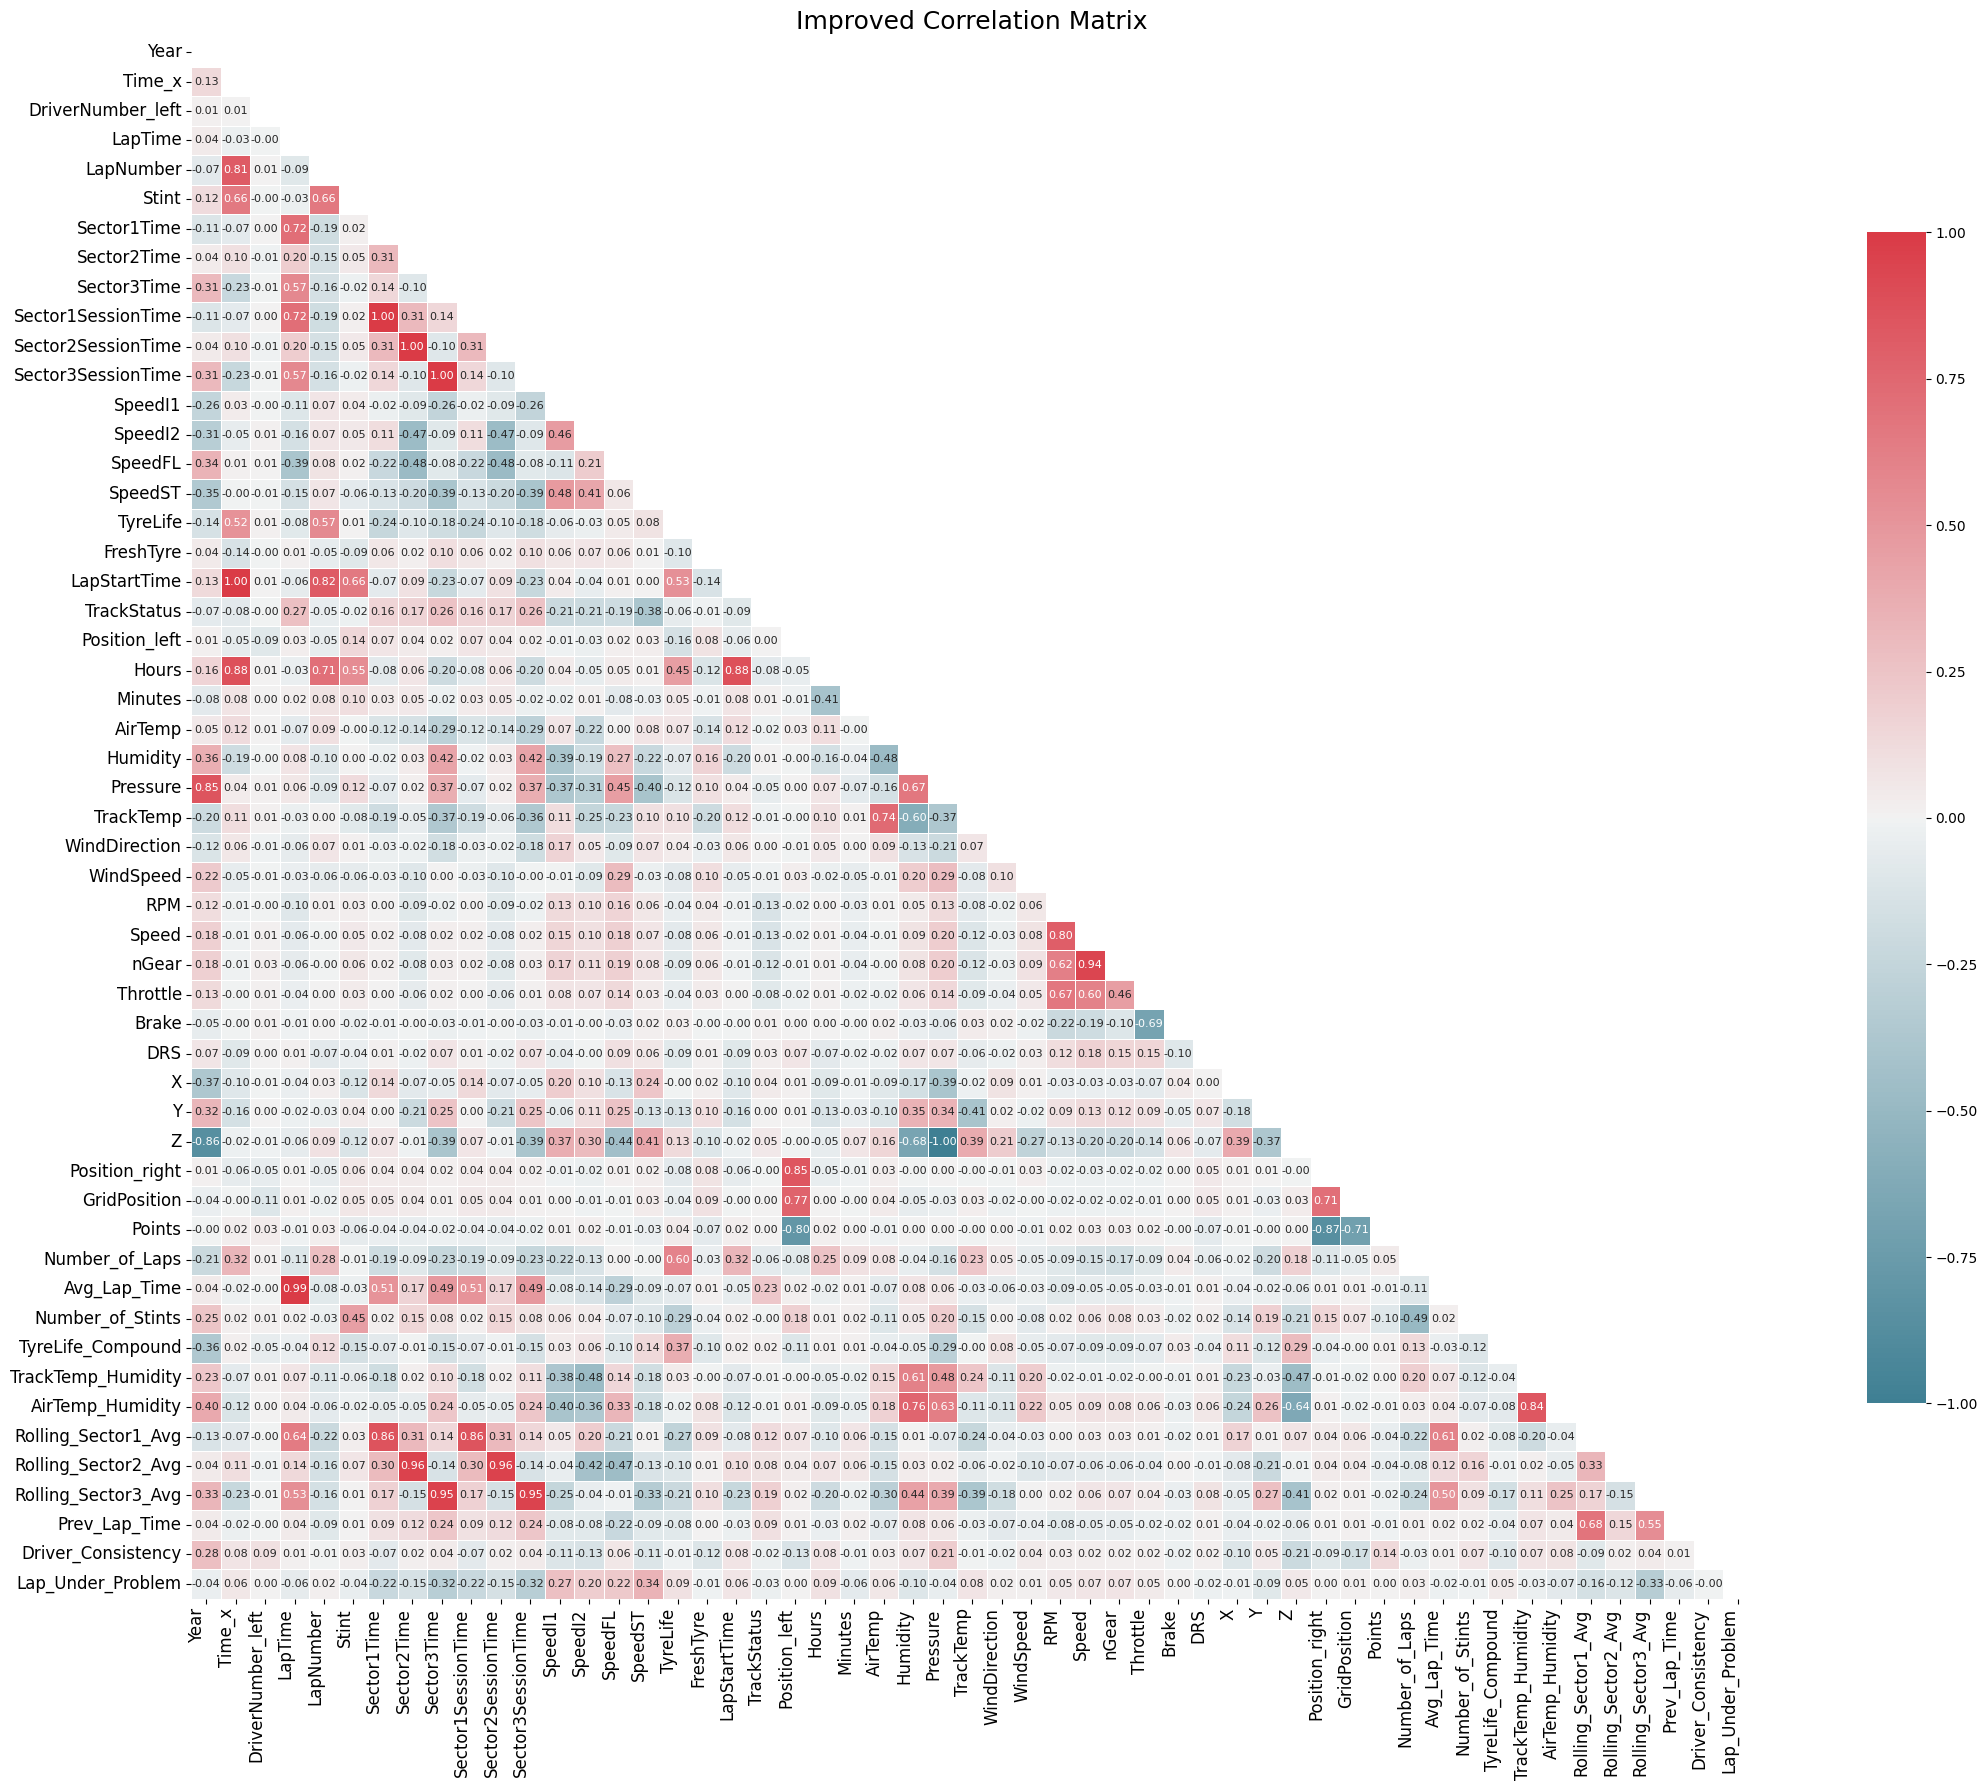

In [17]:
# Correlation Matrix

# Select only the numerical columns
numerical_columns = merged_data.select_dtypes(include=['float64', 'int64', 'timedelta64[ns]'])

# Compute the correlation matrix
corr_matrix = numerical_columns.corr()

# Generate a mask for the upper triangle (to hide redundant information)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure with a bigger size for better readability
plt.figure(figsize=(24, 18))

# Generate a custom color map (for better visibility of negative and positive correlations)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, annot=True, fmt='.2f', annot_kws={"size": 8},
            linewidths=.5, cbar_kws={"shrink": .75})

# Set titles and labels
plt.title('Improved Correlation Matrix', fontsize=18)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Show the plot with a tight layout to avoid overlapping
plt.tight_layout()
plt.show()

In [18]:
# After dropping, formatting, and engineering some features, check the data again
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23660 entries, 0 to 23659
Data columns (total 60 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   EventName            23660 non-null  int32  
 1   Year                 23660 non-null  int64  
 2   Time_x               23660 non-null  float64
 3   Driver               23660 non-null  int32  
 4   DriverNumber_left    23660 non-null  int64  
 5   LapTime              23510 non-null  float64
 6   LapNumber            23660 non-null  float64
 7   Stint                23660 non-null  float64
 8   Sector1Time          23199 non-null  float64
 9   Sector2Time          23634 non-null  float64
 10  Sector3Time          23610 non-null  float64
 11  Sector1SessionTime   23199 non-null  float64
 12  Sector2SessionTime   23634 non-null  float64
 13  Sector3SessionTime   23610 non-null  float64
 14  SpeedI1              20305 non-null  float64
 15  SpeedI2              23634 non-null 

In [19]:
# ML MODELS
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, r2_score
from sklearn.linear_model import LinearRegression

# Feature Selection
# merged_data[['TyreLife','Sector1Time', 'Sector2Time', 'Sector3Time', 'AirTemp', 'TrackTemp', 'Speed', 'GridPosition', 'TrackStatus', 'Position_left', 'Points', 'LapNumber', 'ClassifiedPosition', 'Driver', 'Team', 'Humidity', 'WindSpeed', 'Pressure', 'Compound']]

# 'FreshTyre', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST'

In [20]:
# Model 1: Predicting the Number of Stints (Random Forest Regressor)

# Prepare the data for predicting Number of Stints
X_stints = merged_data[['TyreLife', 'Sector1Time', 'Sector2Time', 'Sector3Time', 'AirTemp', 'TrackTemp', 'Speed', 'GridPosition',
                     'TrackStatus',  'Position_left', 'Points', 'LapNumber', 'ClassifiedPosition', 'Driver', 'Team', 'Humidity', 
                         'WindSpeed', 'Pressure', 'Compound', 'FreshTyre', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST',
                         'WindDirection', 'DRS', 'Throttle', 'Year', 'EventName']]
y_stints = merged_data['Number_of_Stints'].dropna()  # Ensure no missing values in target

# Scaling the features
scaler = StandardScaler()
X_stints_scaled = scaler.fit_transform(X_stints)

# Align features with target
X_stints_scaled = X_stints_scaled[:len(y_stints)]  # Match length

# Train-test split
X_train_stints, X_test_stints, y_train_stints, y_test_stints = train_test_split(X_stints_scaled, y_stints, test_size=0.2, random_state=42)

# Create and train the model
model_stints_rf = RandomForestRegressor(n_estimators=1000, max_depth= None, min_samples_leaf= 1, min_samples_split= 2, random_state=42)
model_stints_rf.fit(X_train_stints, y_train_stints)

# Make predictions
y_pred_stints = model_stints_rf.predict(X_test_stints)

# Evaluate the model
mae_stints = mean_absolute_error(y_test_stints, y_pred_stints)
mse_stints = mean_squared_error(y_test_stints, y_pred_stints)
r2_stints = r2_score(y_test_stints, y_pred_stints)

print(f'RandomForest - Mean Absolute Error: {mae_stints}')
print(f'RandomForest - Mean Squared Error: {mse_stints}')
print(f'RandomForest - R-squared: {r2_stints}')

RandomForest - Mean Absolute Error: 0.012673922231614506
RandomForest - Mean Squared Error: 0.0032290623415046483
RandomForest - R-squared: 0.9941484755735829


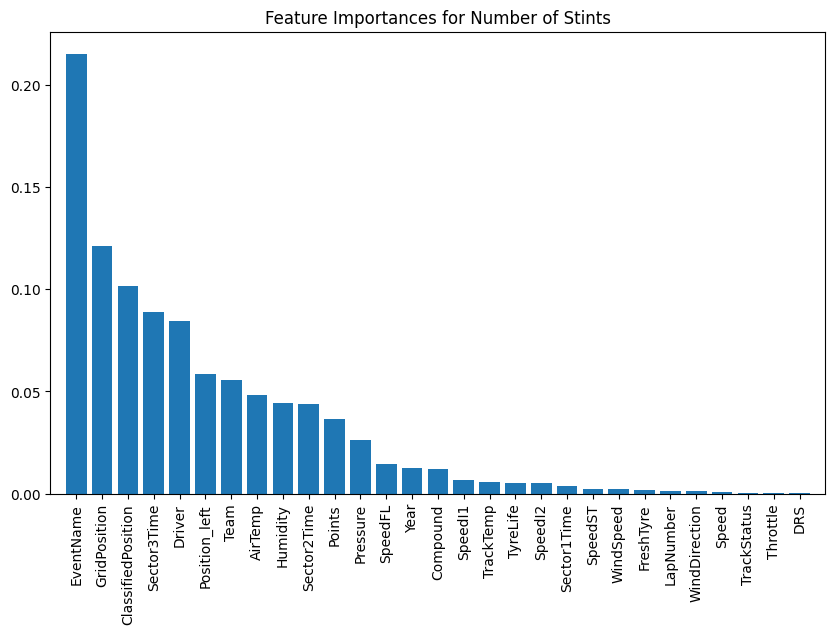

In [21]:
# Model 1
# Feature importance
importances_stints = model_stints_rf.feature_importances_
feature_names = X_stints.columns
indices_stints = np.argsort(importances_stints)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances for Number of Stints")
plt.bar(range(X_stints.shape[1]), importances_stints[indices_stints], align="center")
plt.xticks(range(X_stints.shape[1]), feature_names[indices_stints], rotation=90)
plt.xlim([-1, X_stints.shape[1]])
plt.show()

In [22]:
# Model 1.2: Predicting the Number of Stints (XGBoost)
from xgboost import XGBRegressor

# Create and train the XGBoost model
model_stint_xgb = XGBRegressor(n_estimators=1000, random_state=42)
# n_estimators=100
# n_estimators= 500, colsample_bytree= 0.8, gamma= 0, learning_rate= 0.01, max_depth= 3, subsample= 0.8,
model_stint_xgb.fit(X_train_stints, y_train_stints)

# Make predictions
y_pred_xgb = model_stint_xgb.predict(X_test_stints)

# Evaluate the model
mae_xgb = mean_absolute_error(y_test_stints, y_pred_xgb)
mse_xgb = mean_squared_error(y_test_stints, y_pred_xgb)
r2_xgb = r2_score(y_test_stints, y_pred_xgb)

print(f'XGBoost - Mean Absolute Error: {mae_xgb}')
print(f'XGBoost - Mean Squared Error: {mse_xgb}')
print(f'XGBoost - R-squared: {r2_xgb}')


XGBoost - Mean Absolute Error: 0.03876370982607844
XGBoost - Mean Squared Error: 0.00739202366280344
XGBoost - R-squared: 0.9866045713424683


In [23]:
# Model 1.3: Predicting the Number of Stints (LightGBM)
import lightgbm as lgb

# Create and train the LightGBM model
model_stint_lgb = lgb.LGBMRegressor(n_estimators=1000, random_state=42)
model_stint_lgb.fit(X_train_stints, y_train_stints)

# Make predictions
y_pred_lgb = model_stint_lgb.predict(X_test_stints)

# Evaluate the model
mae_lgb = mean_absolute_error(y_test_stints, y_pred_lgb)
mse_lgb = mean_squared_error(y_test_stints, y_pred_lgb)
r2_lgb = r2_score(y_test_stints, y_pred_lgb)

print(f'LightGBM - Mean Absolute Error: {mae_lgb}')
print(f'LightGBM - Mean Squared Error: {mse_lgb}')
print(f'LightGBM - R-squared: {r2_lgb}')


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3082
[LightGBM] [Info] Number of data points in the train set: 18928, number of used features: 29
[LightGBM] [Info] Start training from score 2.771397
LightGBM - Mean Absolute Error: 0.02604732828309602
LightGBM - Mean Squared Error: 0.003042526636045272
LightGBM - R-squared: 0.9944865050451309


In [121]:
# Model 1.4: Predicting the Number of Stints (CatBoost)
from catboost import CatBoostRegressor

# Create and train the CatBoost model
model_stint_catboost = CatBoostRegressor(iterations= 3500,learning_rate= 0.05,depth= 5,objective='RMSE',
            eval_metric= 'RMSE',verbose= 500,border_count=254,task_type='CPU',use_best_model=False)
# n_estimators=100 - 300
# bagging_temperature=0.8, learning_rate=0.07
model_stint_catboost.fit(X_train_stints, y_train_stints)

# Make predictions
y_pred_catboost = model_stint_catboost.predict(X_test_stints)

# Evaluate the model
mae_catboost = mean_absolute_error(y_test_stints, y_pred_catboost)
mse_catboost = mean_squared_error(y_test_stints, y_pred_catboost)
r2_catboost = r2_score(y_test_stints, y_pred_catboost)

print(f'CatBoost - Mean Absolute Error: {mae_catboost}')
print(f'CatBoost - Mean Squared Error: {mse_catboost}')
print(f'CatBoost - R-squared: {r2_catboost}')

0:	learn: 0.7122146	total: 4.82ms	remaining: 16.9s
500:	learn: 0.1666955	total: 2.15s	remaining: 12.9s
1000:	learn: 0.0914216	total: 4.51s	remaining: 11.3s
1500:	learn: 0.0624135	total: 6.89s	remaining: 9.18s
2000:	learn: 0.0481740	total: 9s	remaining: 6.74s
2500:	learn: 0.0405214	total: 11s	remaining: 4.41s
3000:	learn: 0.0352445	total: 13.1s	remaining: 2.18s
3499:	learn: 0.0313245	total: 15.1s	remaining: 0us
CatBoost - Mean Absolute Error: 0.030360212202687947
CatBoost - Mean Squared Error: 0.0032268123731816595
CatBoost - R-squared: 0.9941525528391195


In [25]:
# Model 2: Predict Used Tire Compound (Classification)
# Import the necessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Prepare the data for predicting Used Tire Compound
X_tire_compound = merged_data[['TyreLife', 'Sector1Time', 'Sector2Time', 'Sector3Time', 'AirTemp', 'TrackTemp', 'Speed', 'GridPosition',
                     'TrackStatus',  'Position_left', 'Points', 'LapNumber', 'ClassifiedPosition', 'Driver', 'Team', 'Humidity', 
                         'WindSpeed', 'Pressure', 'FreshTyre', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST',
                         'WindDirection', 'DRS', 'Throttle', 'Year', 'EventName']]
y_tire_compound = merged_data['Used_Tire_Compound'].dropna()  # Ensure no missing values in the target

# Reuse the scaler to scale features
X_tire_compound_scaled = scaler.fit_transform(X_tire_compound)  # Scale the features

# Align features with target
X_tire_compound_scaled = X_tire_compound_scaled[:len(y_tire_compound)]  # Match length

# Train-test split
X_train_tire, X_test_tire, y_train_tire, y_test_tire = train_test_split(
    X_tire_compound_scaled, y_tire_compound, test_size=0.2, random_state=42)

# Create and train the classifier
model_tire_rf = RandomForestClassifier(n_estimators=1000, max_depth= None, min_samples_leaf= 1, min_samples_split= 2, random_state=42)
model_tire_rf.fit(X_train_tire, y_train_tire)

# Make predictions
y_pred_tire = model_tire_rf.predict(X_test_tire)

# Evaluate the model
accuracy = accuracy_score(y_test_tire, y_pred_tire)
precision = precision_score(y_test_tire, y_pred_tire, average='weighted')
recall = recall_score(y_test_tire, y_pred_tire, average='weighted')
f1 = f1_score(y_test_tire, y_pred_tire, average='weighted')

print(f'RandomForest - Accuracy: {accuracy}')
print(f'RandomForest - Precision: {precision}')
print(f'RandomForest - Recall: {recall}')
print(f'RandomForest - F1 Score: {f1}')

RandomForest - Accuracy: 0.981614539306847
RandomForest - Precision: 0.9817058359616767
RandomForest - Recall: 0.981614539306847
RandomForest - F1 Score: 0.981428719869782


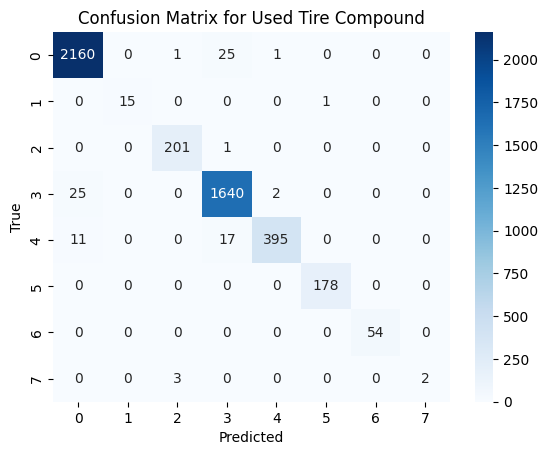

In [26]:
# Model 2. Confusion Matrix
# Plot the confusion matrix
cm = confusion_matrix(y_test_tire, y_pred_tire)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_tire_compound), yticklabels=np.unique(y_tire_compound))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Used Tire Compound')
plt.show()


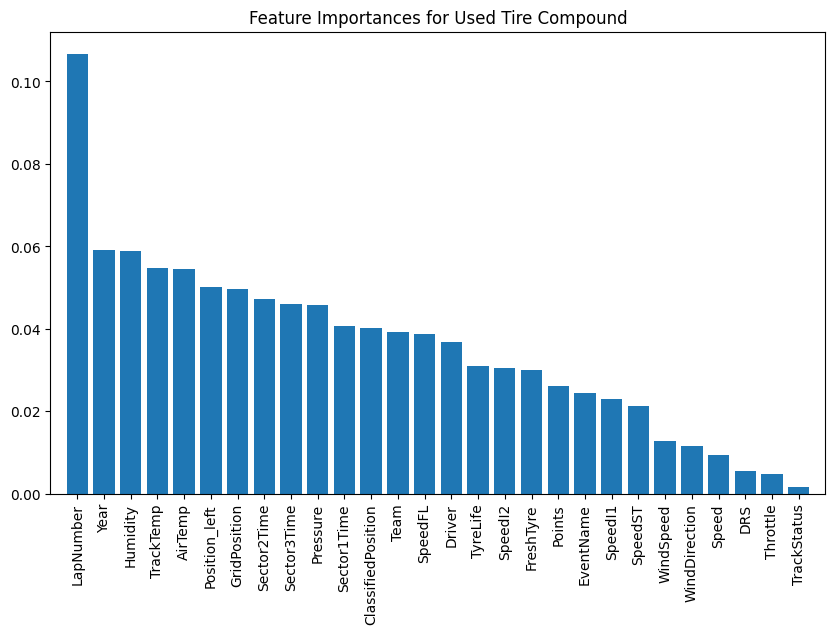

In [27]:
# Model 2.
# Feature Importance
# Get feature importances from the model
importances_tire = model_tire_rf.feature_importances_
feature_names = X_tire_compound.columns
indices_tire = np.argsort(importances_tire)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances for Used Tire Compound")
plt.bar(range(X_tire_compound.shape[1]), importances_tire[indices_tire], align="center")
plt.xticks(range(X_tire_compound.shape[1]), feature_names[indices_tire], rotation=90)
plt.xlim([-1, X_tire_compound.shape[1]])
plt.show()


In [28]:
# Model 2.2: Predicting Used Tire Compound (XGBoost)
from xgboost import XGBClassifier

# Create and train the XGBoost model
model_tire_xgb = XGBClassifier(n_estimators=1000, random_state=42)
model_tire_xgb.fit(X_train_tire, y_train_tire)

# Make predictions
y_pred_xgb = model_tire_xgb.predict(X_test_tire)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test_tire, y_pred_xgb)
precision_xgb = precision_score(y_test_tire, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test_tire, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test_tire, y_pred_xgb, average='weighted')

print(f'XGBoost - Accuracy: {accuracy_xgb}')
print(f'XGBoost - Precision: {precision_xgb}')
print(f'XGBoost - Recall: {recall_xgb}')
print(f'XGBoost - F1 Score: {f1_xgb}')


XGBoost - Accuracy: 0.992603550295858
XGBoost - Precision: 0.9926096129563462
XGBoost - Recall: 0.992603550295858
XGBoost - F1 Score: 0.992599673026773


In [29]:
# Model 2.3: Predicting Used Tire Compound (LightGBM)
# import lightgbm as lgb

# Create and train the LightGBM model
model_tire_lgb = lgb.LGBMClassifier(n_estimators=1000, random_state=42, verbose=-1) # verbose=-1 disable warnings
model_tire_lgb.fit(X_train_tire, y_train_tire)

# Make predictions
y_pred_lgb = model_tire_lgb.predict(X_test_tire)

# Evaluate the model
accuracy_lgb = accuracy_score(y_test_tire, y_pred_lgb)
precision_lgb = precision_score(y_test_tire, y_pred_lgb, average='weighted')
recall_lgb = recall_score(y_test_tire, y_pred_lgb, average='weighted')
f1_lgb = f1_score(y_test_tire, y_pred_lgb, average='weighted')

print(f'LightGBM - Accuracy: {accuracy_lgb}')
print(f'LightGBM - Precision: {precision_lgb}')
print(f'LightGBM - Recall: {recall_lgb}')
print(f'LightGBM - F1 Score: {f1_lgb}')


LightGBM - Accuracy: 0.9909129332206256
LightGBM - Precision: 0.9923309743763387
LightGBM - Recall: 0.9909129332206256
LightGBM - F1 Score: 0.9915604645386497


In [131]:
# Model 2.4: Predicting Used Tire Compound (CatBoost)
# from catboost import CatBoostClassifier

# Create and train the CatBoost model
model_tire_catboost = CatBoostClassifier(iterations= 3500,learning_rate= 0.05,depth= 5,objective='MultiClass',
            eval_metric= 'MultiClass',verbose= 500,border_count=254,task_type='CPU',use_best_model=False)
# MultiClassOneVsAll
# n_estimators=100, random_state=42, verbose=0
model_tire_catboost.fit(X_train_tire, y_train_tire)

# Make predictions
y_pred_catboost = model_tire_catboost.predict(X_test_tire)

# Evaluate the model
accuracy_catboost = accuracy_score(y_test_tire, y_pred_catboost)
precision_catboost = precision_score(y_test_tire, y_pred_catboost, average='weighted')
recall_catboost = recall_score(y_test_tire, y_pred_catboost, average='weighted')
f1_catboost = f1_score(y_test_tire, y_pred_catboost, average='weighted')

print(f'CatBoost - Accuracy: {accuracy_catboost}')
print(f'CatBoost - Precision: {precision_catboost}')
print(f'CatBoost - Recall: {recall_catboost}')
print(f'CatBoost - F1 Score: {f1_catboost}')


0:	learn: 0.6581504	total: 20.7ms	remaining: 1m 12s
500:	learn: 0.0717407	total: 10.5s	remaining: 1m 2s
1000:	learn: 0.0480369	total: 20.7s	remaining: 51.6s
1500:	learn: 0.0362770	total: 31s	remaining: 41.3s
2000:	learn: 0.0287629	total: 42.2s	remaining: 31.6s
2500:	learn: 0.0236227	total: 52.6s	remaining: 21s
3000:	learn: 0.0199186	total: 1m 3s	remaining: 10.5s
3499:	learn: 0.0170552	total: 1m 14s	remaining: 0us
CatBoost - Accuracy: 0.9824598478444633
CatBoost - Precision: 0.982491142089813
CatBoost - Recall: 0.9824598478444633
CatBoost - F1 Score: 0.9824428066497395


In [31]:
## Model 3: Predicting Number of Laps within Each Stint (Regression)

# Prepare the data for predicting Number of Laps
X_number_of_laps = merged_data[['TyreLife', 'Sector1Time', 'Sector2Time', 'Sector3Time', 'AirTemp', 'TrackTemp', 'Speed', 'GridPosition', 
                      'TrackStatus', 'Position_left', 'Points', 'ClassifiedPosition', 'Driver', 'Team', 'Humidity', 
                         'WindSpeed', 'Pressure', 'Compound', 'FreshTyre', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST',
                         'WindDirection', 'DRS', 'Throttle', 'Year', 'EventName']]
# 'LapNumber'
y_number_of_laps = merged_data['Number_of_Laps'].dropna()  # Ensure no missing values in the target

# Reuse the scaler to scale features
X_number_of_laps_scaled = scaler.fit_transform(X_number_of_laps)  # Scale the features

# Align features with target
X_number_of_laps_scaled = X_number_of_laps_scaled[:len(y_number_of_laps)]  # Match length

# Train-test split
X_train_laps, X_test_laps, y_train_laps, y_test_laps = train_test_split(
    X_number_of_laps_scaled, y_number_of_laps, test_size=0.2, random_state=42)

# Create and train the model
model_laps_rf = RandomForestRegressor(n_estimators=400, max_depth= None, min_samples_leaf= 1, min_samples_split= 2, random_state=42)
# n_estimators=500
# n_estimators=1000 worse 
model_laps_rf.fit(X_train_laps, y_train_laps)

# Make predictions
y_pred_laps = model_laps_rf.predict(X_test_laps)

# Evaluate the model
mae_laps = mean_absolute_error(y_test_laps, y_pred_laps)
mse_laps = mean_squared_error(y_test_laps, y_pred_laps)
r2_laps = r2_score(y_test_laps, y_pred_laps)

print(f'RandomForest - Mean Absolute Error for Number of Laps: {mae_laps}')
print(f'RandomForest - Mean Squared Error for Number of Laps: {mse_laps}')
print(f'RandomForest - R-squared for Number of Laps: {r2_laps}')


RandomForest - Mean Absolute Error for Number of Laps: 0.92875792476754
RandomForest - Mean Squared Error for Number of Laps: 3.87517179443153
RandomForest - R-squared for Number of Laps: 0.9819097000788735


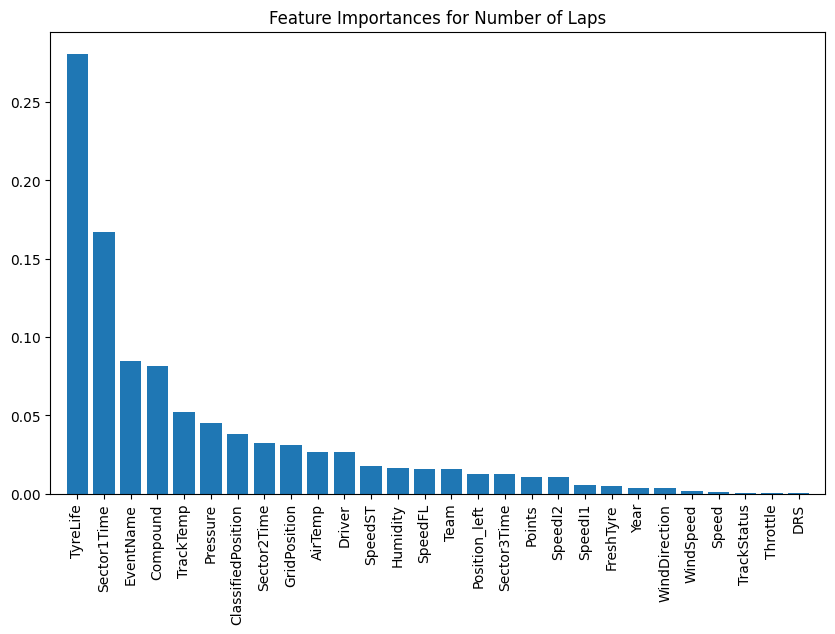

In [32]:
# Model 3.
# Feature Importance
# Get feature importances from the model
importances_laps = model_laps_rf.feature_importances_
feature_names = X_number_of_laps.columns
indices_laps = np.argsort(importances_laps)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances for Number of Laps")
plt.bar(range(X_number_of_laps.shape[1]), importances_laps[indices_laps], align="center")
plt.xticks(range(X_number_of_laps.shape[1]), feature_names[indices_laps], rotation=90)
plt.xlim([-1, X_number_of_laps.shape[1]])
plt.show()


In [33]:
# Model 3.2: Predicting Number of Laps within Each Stint (XGBoost)
# from xgboost import XGBRegressor

# Create and train the XGBoost model
xgb_model_laps = XGBRegressor(n_estimators=1000, random_state=42)
xgb_model_laps.fit(X_train_laps, y_train_laps)

# Make predictions
y_pred_laps_xgb = xgb_model_laps.predict(X_test_laps)

# Evaluate the XGBoost model
mae_laps_xgb = mean_absolute_error(y_test_laps, y_pred_laps_xgb)
mse_laps_xgb = mean_squared_error(y_test_laps, y_pred_laps_xgb)
r2_laps_xgb = r2_score(y_test_laps, y_pred_laps_xgb)

print(f'Mean Absolute Error (XGBoost): {mae_laps_xgb}')
print(f'Mean Squared Error (XGBoost): {mse_laps_xgb}')
print(f'R-squared (XGBoost): {r2_laps_xgb}')


Mean Absolute Error (XGBoost): 1.5733404436911553
Mean Squared Error (XGBoost): 5.714468346741514
R-squared (XGBoost): 0.973323404788971


In [34]:
# Model 3.3: Predicting Number of Laps within Each Stint (LightGBM)
# import lightgbm as lgb

# Create and train the LightGBM model
lgb_model_laps = lgb.LGBMRegressor(n_estimators=1000, random_state=42)
lgb_model_laps.fit(X_train_laps, y_train_laps)

# Make predictions
y_pred_laps_lgb = lgb_model_laps.predict(X_test_laps)

# Evaluate the LightGBM model
mae_laps_lgb = mean_absolute_error(y_test_laps, y_pred_laps_lgb)
mse_laps_lgb = mean_squared_error(y_test_laps, y_pred_laps_lgb)
r2_laps_lgb = r2_score(y_test_laps, y_pred_laps_lgb)

print(f'Mean Absolute Error (LightGBM): {mae_laps_lgb}')
print(f'Mean Squared Error (LightGBM): {mse_laps_lgb}')
print(f'R-squared (LightGBM): {r2_laps_lgb}')


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002773 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3003
[LightGBM] [Info] Number of data points in the train set: 18928, number of used features: 28
[LightGBM] [Info] Start training from score 29.823066
Mean Absolute Error (LightGBM): 1.4044326017365172
Mean Squared Error (LightGBM): 4.929155124275233
R-squared (LightGBM): 0.9769894344596464


In [123]:
# Model 3.4: Predicting Number of Laps within Each Stint (CatBoost)
# from catboost import CatBoostRegressor

# Create and train the CatBoost model
catboost_model_laps = CatBoostRegressor(iterations= 3500,learning_rate= 0.05,depth= 5,objective='RMSE',
            eval_metric= 'RMSE',verbose= 500,border_count=254,task_type='CPU',use_best_model=False)
catboost_model_laps.fit(X_train_laps, y_train_laps)

# Make predictions
y_pred_laps_catboost = catboost_model_laps.predict(X_test_laps)

# Evaluate the CatBoost model
mae_laps_catboost = mean_absolute_error(y_test_laps, y_pred_laps_catboost)
mse_laps_catboost = mean_squared_error(y_test_laps, y_pred_laps_catboost)
r2_laps_catboost = r2_score(y_test_laps, y_pred_laps_catboost)

print(f'Mean Absolute Error (CatBoost): {mae_laps_catboost}')
print(f'Mean Squared Error (CatBoost): {mse_laps_catboost}')
print(f'R-squared (CatBoost): {r2_laps_catboost}')


0:	learn: 14.0775946	total: 4.42ms	remaining: 15.5s
500:	learn: 4.5588013	total: 2.05s	remaining: 12.3s
1000:	learn: 3.4620471	total: 4.07s	remaining: 10.1s
1500:	learn: 2.8803062	total: 6.5s	remaining: 8.65s
2000:	learn: 2.4995261	total: 8.57s	remaining: 6.42s
2500:	learn: 2.2170895	total: 10.7s	remaining: 4.29s
3000:	learn: 1.9710886	total: 13.1s	remaining: 2.17s
3499:	learn: 1.7935676	total: 15.4s	remaining: 0us
Mean Absolute Error (CatBoost): 1.738457524811988
Mean Squared Error (CatBoost): 6.453980788572488
R-squared (CatBoost): 0.9698711555657387


In [36]:
merged_data.columns

Index(['EventName', 'Year', 'Time_x', 'Driver', 'DriverNumber_left', 'LapTime',
       'LapNumber', 'Stint', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'Compound', 'TyreLife',
       'FreshTyre', 'Team', 'LapStartTime', 'TrackStatus', 'Position_left',
       'Hours', 'Minutes', 'AirTemp', 'Humidity', 'Pressure', 'Rainfall',
       'TrackTemp', 'WindDirection', 'WindSpeed', 'RPM', 'Speed', 'nGear',
       'Throttle', 'Brake', 'DRS', 'X', 'Y', 'Z', 'Position_right',
       'ClassifiedPosition', 'GridPosition', 'Points', 'Number_of_Laps',
       'Used_Tire_Compound', 'Avg_Lap_Time', 'Number_of_Stints',
       'TyreLife_Compound', 'TrackTemp_Humidity', 'AirTemp_Humidity',
       'Rolling_Sector1_Avg', 'Rolling_Sector2_Avg', 'Rolling_Sector3_Avg',
       'Prev_Lap_Time', 'Driver_Consistency', 'Lap_Under_Problem'],
      dtype='object')

In [37]:
merged_data['Driver']

0        31
1        31
2        31
3        31
4        31
         ..
23655    21
23656    21
23657    21
23658    21
23659    21
Name: Driver, Length: 23660, dtype: int32

In [38]:
## Model 4: Predict Average Lap Time per Stint (Regression)

# Prepare the data
X_avg_lap = merged_data[['EventName', 'Year', 'Time_x', 'Driver', 'DriverNumber_left', 
       'LapNumber', 'Stint', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'Compound', 'TyreLife',
       'FreshTyre', 'Team', 'LapStartTime', 'TrackStatus', 'Position_left',
       'Hours', 'Minutes', 'AirTemp', 'Humidity', 'Pressure', 'Rainfall',
       'TrackTemp', 'WindDirection', 'WindSpeed', 'RPM', 'Speed', 'nGear',
       'Throttle', 'Brake', 'DRS', 'X', 'Y', 'Z', 'Position_right',
       'ClassifiedPosition', 'GridPosition', 'Points', 'Number_of_Laps',
       'Used_Tire_Compound', 'Number_of_Stints',
       'TyreLife_Compound', 'TrackTemp_Humidity', 'AirTemp_Humidity',
       'Rolling_Sector1_Avg', 'Rolling_Sector2_Avg', 'Rolling_Sector3_Avg',
       'Prev_Lap_Time', 'Driver_Consistency', 'Lap_Under_Problem']]
# 'LapTime',
y_avg_lap = merged_data['Avg_Lap_Time'].dropna()  # Ensure no missing values in target

# Reuse the scaler to scale features
X_avg_lap_scaled = scaler.fit_transform(X_avg_lap)  # Reuse the scaler

# Align features with target
X_avg_lap_scaled = X_avg_lap_scaled[:len(y_avg_lap)]  # Match length

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_avg_lap_scaled, y_avg_lap, test_size=0.2, random_state=42)

# Create and train the model
model_avglap_rf = RandomForestRegressor(n_estimators=200, max_depth= None, min_samples_leaf= 1, min_samples_split= 2, random_state=42)
# n_estimators=100, 300, 400, 500, 1000
model_avglap_rf.fit(X_train, y_train)

# Make predictions
y_pred = model_avglap_rf.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'RandomForest - Mean Absolute Error: {mae}')
print(f'RandomForest - Mean Squared Error: {mse}')
print(f'RandomForest - R-squared: {r2}')


RandomForest - Mean Absolute Error: 1.75086645288707
RandomForest - Mean Squared Error: 1224.5315093749305
RandomForest - R-squared: 0.8594588858664666


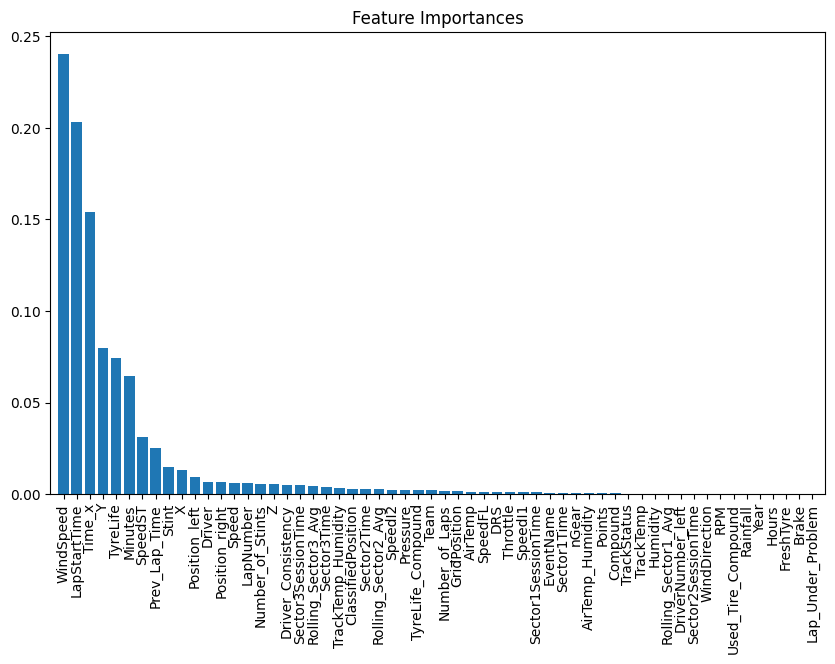

In [39]:
# Model 4.
# Feature Importance
import matplotlib.pyplot as plt

# Get feature importances from the model
importances = model_avglap_rf.feature_importances_
feature_names = X_avg_lap.columns  # Use original column names for better readability
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_avg_lap.shape[1]), importances[indices], align="center")
plt.xticks(range(X_avg_lap.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_avg_lap.shape[1]])
plt.show()


In [137]:
# Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE

# Ensure X_train is a DataFrame
if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train, columns=[f'Feature {i}' for i in range(X_train.shape[1])])

# Perform RFE
rfe = RFE(model_avglap_rf, n_features_to_select=20)
rfe.fit(X_train, y_train)

# Print selected features
print(f"Selected Features: {X_train.columns[rfe.support_]}")

Selected Features: Index(['Feature 2', 'Feature 3', 'Feature 5', 'Feature 6', 'Feature 8',
       'Feature 9', 'Feature 16', 'Feature 18', 'Feature 21', 'Feature 23',
       'Feature 25', 'Feature 28', 'Feature 32', 'Feature 34', 'Feature 39',
       'Feature 40', 'Feature 42', 'Feature 43', 'Feature 48', 'Feature 55'],
      dtype='object')


In [40]:
## Model 4.2: Predict Average Lap Time per Stint (XGBoost)
# Import XGBoost
from xgboost import XGBRegressor

# Create and train the XGBoost model
xgb_model_avglap = XGBRegressor(n_estimators=1000, learning_rate=0.05, random_state=42)
xgb_model_avglap.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model_avglap.predict(X_test)

# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print evaluation metrics
print(f'Mean Absolute Error (XGBoost): {mae_xgb}')
print(f'Mean Squared Error (XGBoost): {mse_xgb}')
print(f'R-squared (XGBoost): {r2_xgb}')


Mean Absolute Error (XGBoost): 3.5922027453514827
Mean Squared Error (XGBoost): 6209.513593145658
R-squared (XGBoost): 0.28732584508708814


In [41]:
## Model 4.3: Predict Average Lap Time per Stint (LightGBM)
# Import LightGBM
import lightgbm as lgb

# Create and train the LightGBM model
lgb_model_avglap = lgb.LGBMRegressor(n_estimators=1000, learning_rate=0.05, random_state=42)
lgb_model_avglap.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lgb = lgb_model_avglap.predict(X_test)

# Evaluate the model
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

# Print evaluation metrics
print(f'Mean Absolute Error (LightGBM): {mae_lgb}')
print(f'Mean Squared Error (LightGBM): {mse_lgb}')
print(f'R-squared (LightGBM): {r2_lgb}')


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6701
[LightGBM] [Info] Number of data points in the train set: 18918, number of used features: 58
[LightGBM] [Info] Start training from score 89.146804
Mean Absolute Error (LightGBM): 4.231758005346177
Mean Squared Error (LightGBM): 3679.24632054455
R-squared (LightGBM): 0.5777279938472275


In [119]:
## Model 4.4: Predict Average Lap Time per Stint (CatBoost)
# Import CatBoost
from catboost import CatBoostRegressor

# Create and train the CatBoost model
catboost_model = CatBoostRegressor(iterations= 3500,learning_rate= 0.05,depth= 5,objective='RMSE',
            eval_metric= 'RMSE',verbose= 500,border_count=254,task_type='CPU',use_best_model=False)
# task_type='GPU'
"""
n_estimators=1000, random_state=42, verbose=0, 
                                   bagging_temperature= 0.2, depth= 3, l2_leaf_reg= 3, 
                                   learning_rate= 0.05, random_strength= 5
"""
catboost_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_cat = catboost_model.predict(X_test)

# Evaluate the model
mae_cat = mean_absolute_error(y_test, y_pred_cat)
mse_cat = mean_squared_error(y_test, y_pred_cat)
r2_cat = r2_score(y_test, y_pred_cat)

# Print evaluation metrics
print(f'Mean Absolute Error (CatBoost): {mae_cat}')
print(f'Mean Squared Error (CatBoost): {mse_cat}')
print(f'R-squared (CatBoost): {r2_cat}')


0:	learn: 51.9253977	total: 6.18ms	remaining: 21.6s
500:	learn: 3.2067144	total: 2.9s	remaining: 17.4s
1000:	learn: 1.7830489	total: 5.93s	remaining: 14.8s
1500:	learn: 1.3825924	total: 8.92s	remaining: 11.9s
2000:	learn: 1.1615276	total: 11.9s	remaining: 8.88s
2500:	learn: 1.0161654	total: 15s	remaining: 5.99s
3000:	learn: 0.9085645	total: 18.1s	remaining: 3s
3499:	learn: 0.8197180	total: 21s	remaining: 0us
Mean Absolute Error (CatBoost): 2.753752132189195
Mean Squared Error (CatBoost): 3295.769840616217
R-squared (CatBoost): 0.6217401007799794


In [43]:
"""
# Save Models as .pkl file
import pickle

# Save the models to .pkl files
with open('model_stint_lgb.pkl', 'wb') as file:
    pickle.dump(model_stint_lgb, file)

with open('model_tire_xgb.pkl', 'wb') as file:
    pickle.dump(model_tire_xgb, file)

with open('model_laps_rf.pkl', 'wb') as file:
    pickle.dump(model_laps_rf, file)

with open('model_avglap_rf.pkl', 'wb') as file:
    pickle.dump(model_avglap_rf, file)
"""

"\n# Save Models as .pkl file\nimport pickle\n\n# Save the models to .pkl files\nwith open('model_stint_lgb.pkl', 'wb') as file:\n    pickle.dump(model_stint_lgb, file)\n\nwith open('model_tire_xgb.pkl', 'wb') as file:\n    pickle.dump(model_tire_xgb, file)\n\nwith open('model_laps_rf.pkl', 'wb') as file:\n    pickle.dump(model_laps_rf, file)\n\nwith open('model_avglap_rf.pkl', 'wb') as file:\n    pickle.dump(model_avglap_rf, file)\n"